In [186]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
plt.style.use('classic')
rc('font', family='serif')
rc('figure', facecolor='w')
from astropy.io import fits, ascii
from astropy.table import Table
from collections import OrderedDict
import os
import math

import TheCannon
from TheCannon import apogee, dataset, model
import apogee_tools as ap
AP_PATH = os.environ['APOGEE_DATA']

line_list = ap.lines
line_names = line_list.keys()

In [178]:
dfile = AP_PATH + '/training_sets/mann_sample/'
rfile = 'train_ref/mann_ref_labels.csv'  

ids, wl, tr_flux, tr_ivar = apogee.load_spectra(dfile)
names_old = [x.split('2-')[1].split('.fits')[0] for x in ids]
tr_ID = ['old' for x in ids]
tr_label = ap.loadLabels(rfile, lbl_names=['TEFF', 'FE_H'])
# tr_label = ap.scaleLabels(ap.loadLabels(rfile, lbl_names=['TEFF', 'FE_H']))

ds_old = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, tr_ID, tr_flux, tr_ivar)

This is the right version
Loading spectra from directory /home/jess/Desktop/Research/apogee_data/training_sets/mann_sample/
Spectra loaded


In [179]:
dfile = AP_PATH + '/training_sets/mann_bonus/'
rfile = 'train_ref/mann_bonus_ref.csv'  

ids, wl, tr_flux, tr_ivar = apogee.load_spectra(dfile)
names_new = [x.split('2-')[1].split('.fits')[0] for x in ids]
tr_ID = ['new' for x in ids]
tr_label = ap.loadLabels(rfile, lbl_names=['TEFF', 'FE_H'])
# tr_label = ap.scaleLabels(ap.loadLabels(rfile, lbl_names=['TEFF', 'FE_H']))

ds_new = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, tr_ID, tr_flux, tr_ivar)

This is the right version
Loading spectra from directory /home/jess/Desktop/Research/apogee_data/training_sets/mann_bonus/
Spectra loaded


In [180]:
tr_label = np.concatenate((ds_old.tr_label, ds_new.tr_label), axis=0)
tr_ID = np.concatenate((ds_old.tr_ID, ds_new.tr_ID), axis=0)
tr_flux = np.concatenate((ds_old.tr_flux, ds_new.tr_flux), axis=0)
tr_ivar = np.concatenate((ds_old.tr_ivar, ds_new.tr_ivar), axis=0)
names = np.concatenate((names_old, names_new), axis=0)

ds_full = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, tr_ID, tr_flux, tr_ivar)
ds_full.set_label_names(['T_{\rm eff}', '[Fe/H]'])

In [77]:
ds_full.tr_label.shape, ds_full.tr_ID.shape, ds_full.tr_flux.shape, ds_full.tr_ivar.shape

((80, 2), (80,), (80, 8575), (80, 8575))

In [80]:
md, ds, synth = ap.fitCannonModel(ds_full)

Done training model. 
Inferring Labels


In [ ]:
ds.diagnostics_1to1()

In [152]:
trn_labels, tst_labels, crv_labels = crossValidate(ds, save_dir='bonus_cross_validation/')

Done training model. 
Inferring Labels
Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [1/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [2/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [3/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [4/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [5/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [6/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [7/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [8/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [9/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [10/80] sources.

Done training model. 
Inferring Labels
79
Inferring Labels
80
Labeled [11/80] sources.

Do

In [211]:
trn_teff = np.array(trn_labels).T[0]
trn_fe_h = np.array(trn_labels).T[1]
tst_teff = np.array(tst_labels).T[0]
tst_fe_h = np.array(tst_labels).T[1]
crv_teff = np.array(crv_labels).T[0]
crv_fe_h = np.array(crv_labels).T[1]

tst_teff_err = tst_teff - trn_teff
crv_teff_err = crv_teff - trn_teff
tst_fe_h_err = tst_fe_h - trn_fe_h
crv_fe_h_err = crv_fe_h - trn_fe_h
teff_tst_crv_diff = tst_teff - crv_teff
fe_h_tst_crv_diff = tst_fe_h - crv_fe_h

In [204]:
d = {'ID':names, 'SAMPLE':tr_ID, 'TRAIN_TEFF':trn_teff, 'TEST_TEFF':tst_teff, 'CROSS_TEFF':crv_teff, \
     'TEST_TEFF_ERR':tst_teff_err, 'CROSS_TEFF_ERR':crv_teff_err, \
     'TEST_CROSS_DIFF_TEFF':teff_tst_crv_diff, \
     'TRAIN_FEH':trn_fe_h, 'TEST_FEH':tst_fe_h, 'CROSS_FEH':crv_fe_h, \
     'TEST_FEH_ERR':tst_teff_err, 'CROSS_FEH_ERR':crv_teff_err, \
     'TEST_CROSS_DIFF_FEH':fe_h_tst_crv_diff}

df = pd.DataFrame(data=OrderedDict(d))
df.to_csv('bonus_sample_results.csv')

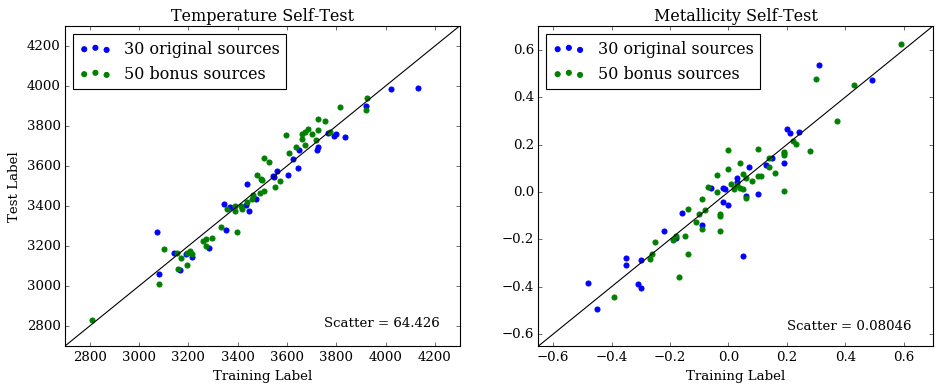

In [212]:
x = np.arange(-1,4300)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5])
ax1.scatter(trn_teff[0:30], tst_teff[0:30], color='b', label='30 original sources')
ax1.scatter(trn_teff[30:80], tst_teff[30:80], color='g', label='50 bonus sources')
ax1.plot(x,x, color='k')
ax1.text(3750, 2800, 'Scatter = 64.426')
ax1.set_xlim(2700,4300)
ax1.set_ylim(2700,4300)
ax1.set_xlabel('Training Label')
ax1.set_ylabel('Test Label')
ax1.set_title('Temperature Self-Test')
ax1.legend(loc='upper left')

ax2.scatter(trn_fe_h[0:30], tst_fe_h[0:30], color='b', label='30 original sources')
ax2.scatter(trn_fe_h[30:80], tst_fe_h[30:80], color='g', label='50 bonus sources')
ax2.plot(x,x, color='k')
ax2.text(.2, -.58, 'Scatter = 0.08046')
ax2.set_xlim(-.65,.7)
ax2.set_ylim(-.65,.7)
ax2.set_xlabel('Training Label')
ax2.set_title('Metallicity Self-Test')
ax2.legend(loc='upper left')
plt.show()

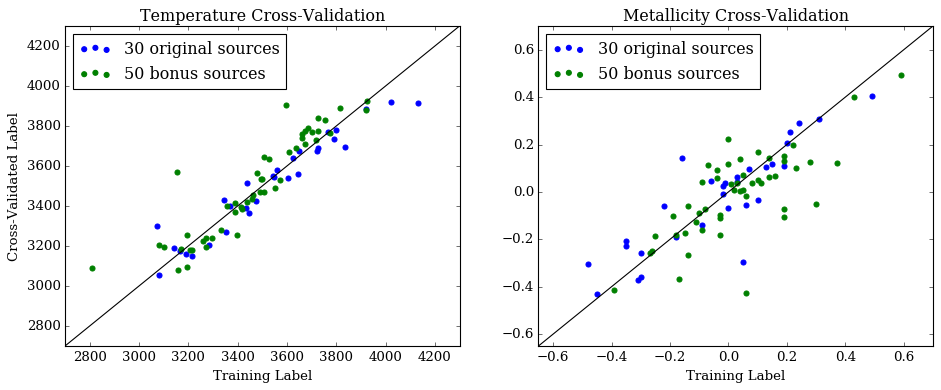

In [213]:
x = np.arange(-1,4300)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5])
ax1.scatter(trn_teff[0:30], crv_teff[0:30], color='b', label='30 original sources')
ax1.scatter(trn_teff[30:80], crv_teff[30:80], color='g', label='50 bonus sources')
ax1.plot(x,x, color='k')
ax1.set_xlim(2700,4300)
ax1.set_ylim(2700,4300)
ax1.set_xlabel('Training Label')
ax1.set_ylabel('Cross-Validated Label')
ax1.set_ylabel('Cross-Validated Label')
ax1.set_title('Temperature Cross-Validation')
ax1.legend(loc='upper left')

ax2.scatter(trn_fe_h[0:30], crv_fe_h[0:30], color='b', label='30 original sources')
ax2.scatter(trn_fe_h[30:80], crv_fe_h[30:80], color='g', label='50 bonus sources')
ax2.plot(x,x, color='k')
ax2.set_xlim(-.65,.7)
ax2.set_ylim(-.65,.7)
ax2.set_xlabel('Training Label')
ax2.set_title('Metallicity Cross-Validation')
ax2.legend(loc='upper left')
plt.show()

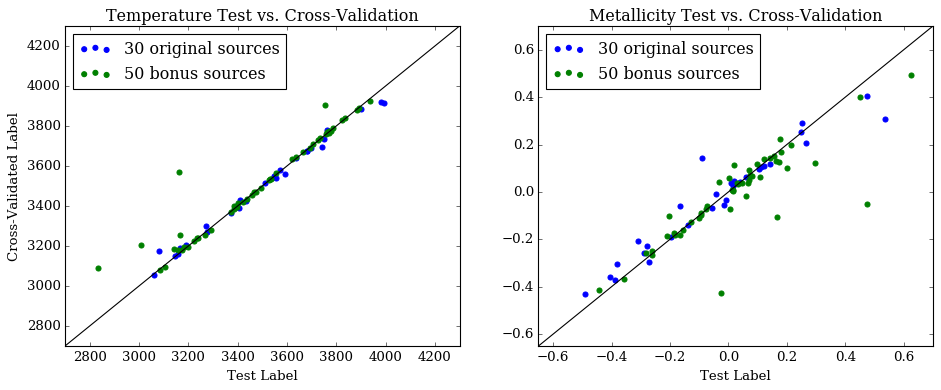

In [214]:
x = np.arange(-1,4300)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=[14,5])
ax1.scatter(tst_teff[0:30], crv_teff[0:30], color='b', label='30 original sources')
ax1.scatter(tst_teff[30:80], crv_teff[30:80], color='g', label='50 bonus sources')
ax1.plot(x,x, color='k')
ax1.set_xlim(2700,4300)
ax1.set_ylim(2700,4300)
ax1.set_xlabel('Test Label')
ax1.set_ylabel('Cross-Validated Label')
ax1.set_title('Temperature Test vs. Cross-Validation')
ax1.legend(loc='upper left')

ax2.scatter(tst_fe_h[0:30], crv_fe_h[0:30], color='b', label='30 original sources')
ax2.scatter(tst_fe_h[30:80], crv_fe_h[30:80], color='g', label='50 bonus sources')
ax2.plot(x,x, color='k')
ax2.set_xlim(-.65,.7)
ax2.set_ylim(-.65,.7)
ax2.set_xlabel('Test Label')
ax2.set_title('Metallicity Test vs. Cross-Validation')
ax2.legend(loc='upper left')
plt.show()

In [157]:
N = tr_label.shape[0]
coeff_n = np.array([np.load('bonus_cross_validation/model_coeff_'+str(i)+'.npy') for i in range(N)])
coeff_full = np.load('bonus_cross_validation/model_coeff_fullset.npy')

def jackknife(l,m):
    
    diff_sq = 0
    for n in range(N): #star
        diff_sq += (coeff_n[n][m][l] - coeff_full[m][l])**2
    
    s = (N-1)/N * diff_sq 
    
    return math.sqrt(s)

npix = len(ds.wl)
jack_err_teff = np.array([jackknife(3,m) for m in range(npix)])
jack_err_fe_h = np.array([jackknife(4,m) for m in range(npix)])

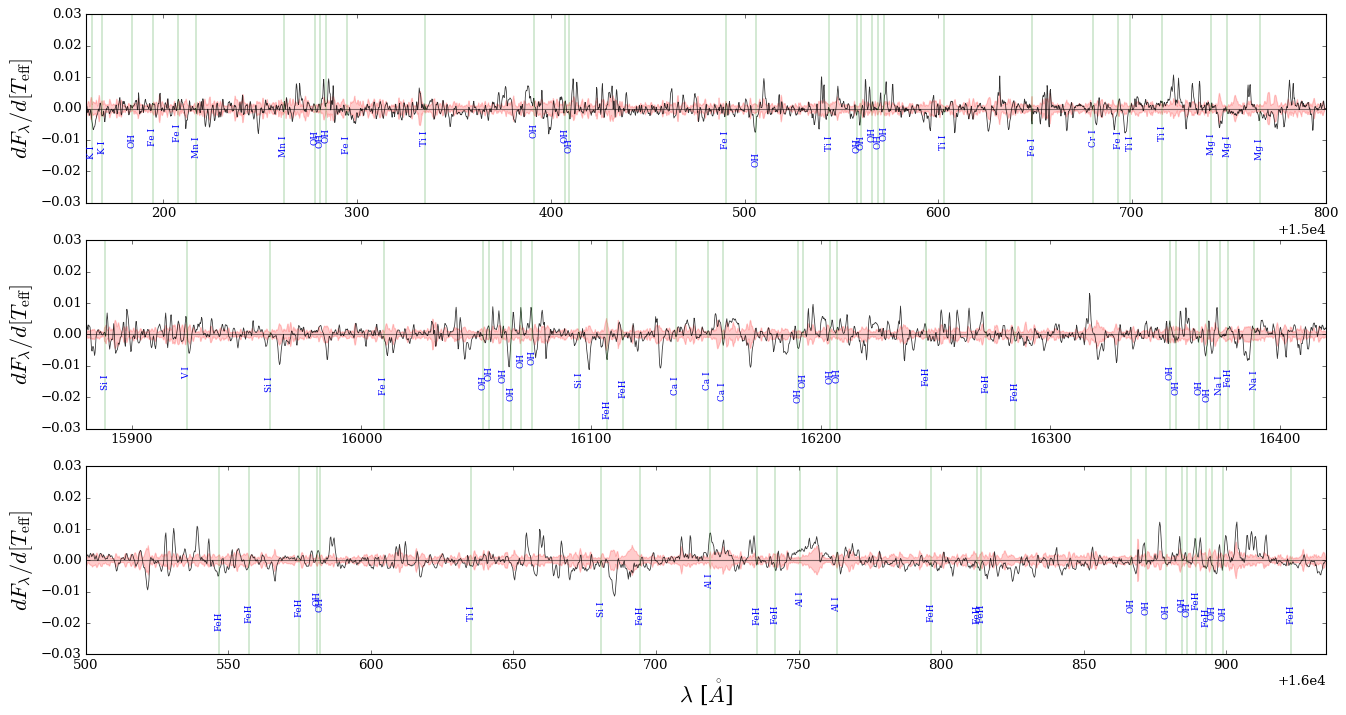

In [216]:
bands = [[15160,15800],[15880,16420],[16500,16935]]
pbands = [np.where((ds.wl > bands[0][0]) & (ds.wl < bands[0][1]))[0], \
    np.where((ds.wl > bands[1][0]) & (ds.wl < bands[1][1]))[0], \
    np.where((ds.wl > bands[2][0]) & (ds.wl < bands[2][1]))[0]]

k = 3
wave = ds.wl
flux = md.coeffs.T[k]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10), facecolor='w', sharey=True)

ax1.plot(ds.wl[pbands[0]], md.coeffs.T[k][pbands[0]], color='k', alpha=.8, linewidth=.7)
ax1.fill_between(ds.wl, -jack_err_teff, jack_err_teff, alpha=.2, color='r')
ax1.axhline(y=0, color='k', alpha=.5)
ax1.set_ylabel(r'$dF_{\lambda}/d[T_{\rm eff}]$', fontsize=20)
ax1.set_xlim(bands[0])
ax1.legend(loc='upper right')

ax2.plot(ds.wl[pbands[1]], md.coeffs.T[k][pbands[1]], color='k', alpha=.8, linewidth=.7)
ax2.fill_between(ds.wl, -jack_err_teff, jack_err_teff, alpha=.2, color='r')
ax2.axhline(y=0, color='k', alpha=.5)
ax2.set_ylabel(r'$dF_{\lambda}/d[T_{\rm eff}]$', fontsize=20)
ax2.set_xlim(bands[1])

ax3.plot(ds.wl[pbands[2]], md.coeffs.T[k][pbands[2]], color='k', alpha=.8, linewidth=.7)
ax3.fill_between(ds.wl, -jack_err_teff, jack_err_teff, alpha=.2, color='r')
ax3.axhline(y=0, color='k', alpha=.5)
ax3.set_ylabel(r'$dF_{\lambda}/d[T_{\rm eff}]$', fontsize=20)
ax3.set_xlabel(r'$\lambda$ [$\mathring{A}$]', fontsize=20)
ax3.set_xlim(bands[2])

xrange = [ds.wl[0], ds.wl[1]]
yrange = [min(md.coeffs.T[k]), max(md.coeffs.T[k])]

for lines in line_names:
    for feature in line_list[lines]:

        # determine position of the line and label based on pixel of the spectrum
        xpos = min(wave, key=lambda x:abs(x - feature))
        index = list(wave).index(xpos)
        ypos = flux[index]
        plot_ypos_min = (ypos - yrange[0] +1)/(yrange[1] - yrange[0])
        plot_ypos_max = (ypos - yrange[0] -1)/(yrange[1] - yrange[0])

        if (feature >= bands[0][0]) & (feature <= bands[0][1]):
            ax1.axvline(x=feature, ymin=plot_ypos_min, ymax=plot_ypos_max, linewidth=.3, color='g')
            ax1.text(feature, ypos-.01, lines, rotation=90, ha='center', color='b', fontsize=8)
       
        elif (feature >= bands[1][0]) & (feature <= bands[1][1]):
            ax2.axvline(x=feature, ymin=plot_ypos_min, ymax=plot_ypos_max, linewidth=.3, color='g')
            ax2.text(feature, ypos-.015, lines, rotation=90, ha='center', color='b', fontsize=8)

        elif (feature >= bands[2][0]) & (feature <= bands[2][1]):
            ax3.axvline(x=feature, ymin=plot_ypos_min, ymax=plot_ypos_max, linewidth=.3, color='g')
            ax3.text(feature, ypos-.015, lines, rotation=90, ha='center', color='b', fontsize=8)

plt.ylim(-.03,.03)
plt.show()

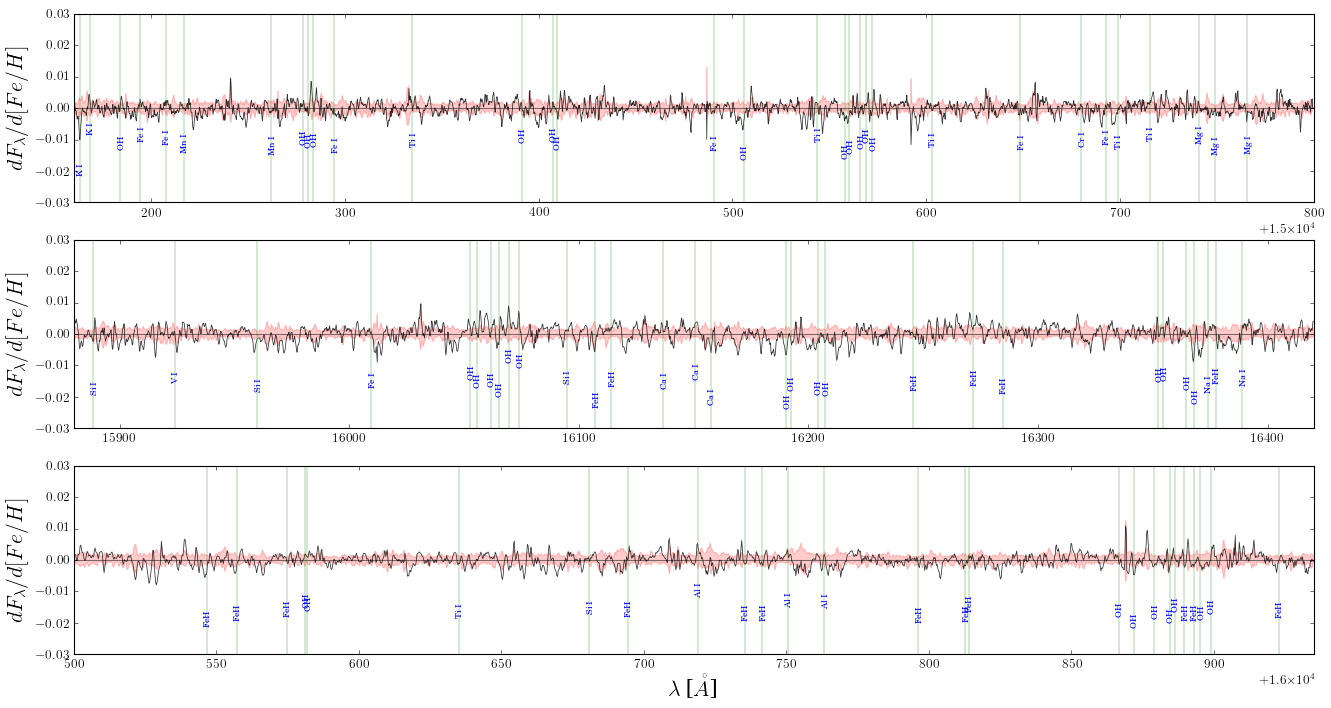

In [88]:
bands = [[15160,15800],[15880,16420],[16500,16935]]
pbands = [np.where((ds.wl > bands[0][0]) & (ds.wl < bands[0][1]))[0], \
    np.where((ds.wl > bands[1][0]) & (ds.wl < bands[1][1]))[0], \
    np.where((ds.wl > bands[2][0]) & (ds.wl < bands[2][1]))[0]]

k = 4
wave = ds.wl
flux = md.coeffs.T[k]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10), facecolor='w', sharey=True)

ax1.plot(ds.wl[pbands[0]], md.coeffs.T[k][pbands[0]], color='k', alpha=.8, linewidth=.7)
ax1.fill_between(ds.wl, -jack_err_teff, jack_err_fe_h, alpha=.2, color='r')
ax1.axhline(y=0, color='k', alpha=.5)
ax1.set_ylabel(r'$dF_{\lambda}/d[Fe/H]$', fontsize=20)
ax1.set_xlim(bands[0])
ax1.legend(loc='upper right')

ax2.plot(ds.wl[pbands[1]], md.coeffs.T[k][pbands[1]], color='k', alpha=.8, linewidth=.7)
ax2.fill_between(ds.wl, -jack_err_teff, jack_err_fe_h, alpha=.2, color='r')
ax2.axhline(y=0, color='k', alpha=.5)
ax2.set_ylabel(r'$dF_{\lambda}/d[Fe/H]$', fontsize=20)
ax2.set_xlim(bands[1])

ax3.plot(ds.wl[pbands[2]], md.coeffs.T[k][pbands[2]], color='k', alpha=.8, linewidth=.7)
ax3.fill_between(ds.wl, -jack_err_teff, jack_err_fe_h, alpha=.2, color='r')
ax3.axhline(y=0, color='k', alpha=.5)
ax3.set_ylabel(r'$dF_{\lambda}/d[Fe/H]$', fontsize=20)
ax3.set_xlabel(r'$\lambda$ [$\mathring{A}$]', fontsize=20)
ax3.set_xlim(bands[2])

xrange = [ds.wl[0], ds.wl[1]]
yrange = [min(md.coeffs.T[k]), max(md.coeffs.T[k])]

for lines in line_names:
    for feature in line_list[lines]:

        # determine position of the line and label based on pixel of the spectrum
        xpos = min(wave, key=lambda x:abs(x - feature))
        index = list(wave).index(xpos)
        ypos = flux[index]
        plot_ypos_min = (ypos - yrange[0] +1)/(yrange[1] - yrange[0])
        plot_ypos_max = (ypos - yrange[0] -1)/(yrange[1] - yrange[0])

        if (feature >= bands[0][0]) & (feature <= bands[0][1]):
            ax1.axvline(x=feature, ymin=plot_ypos_min, ymax=plot_ypos_max, linewidth=.3, color='g')
            ax1.text(feature, ypos-.01, lines, rotation=90, ha='center', color='b', fontsize=8)
       
        elif (feature >= bands[1][0]) & (feature <= bands[1][1]):
            ax2.axvline(x=feature, ymin=plot_ypos_min, ymax=plot_ypos_max, linewidth=.3, color='g')
            ax2.text(feature, ypos-.015, lines, rotation=90, ha='center', color='b', fontsize=8)

        elif (feature >= bands[2][0]) & (feature <= bands[2][1]):
            ax3.axvline(x=feature, ymin=plot_ypos_min, ymax=plot_ypos_max, linewidth=.3, color='g')
            ax3.text(feature, ypos-.015, lines, rotation=90, ha='center', color='b', fontsize=8)

plt.ylim(-.03,.03)
plt.show()

In [151]:
def crossValidate(ds, **kwargs):

    """
    Cross-validation test of Cannon test spectra
    Input:  'ds' : dataset object output from initializeTrainingSet()
    Output: plot training label vs. inferred label left out of set
            return training label and inferred label
    """

    # optional
    label_names = kwargs.get('lbl_names', ['Teff', 'Fe/H'])
    save_dir = kwargs.get('save_dir', 'cross_validation/')

    # ds: Data set of all objects (including n); continuum normalized in initializeTrainingSet()
    wl = ds.wl
    N = len(ds.tr_ID)

    # Training labels and cross-validated labels
    trn_labels, crv_labels = [], []
    
    ds.set_label_names(label_names) 
    md, synth_fluxes, tst_labels = ap.runCannon(ds)
    np.save(save_dir+'model_coeff_fullset', md.coeffs)
    np.save(save_dir+'synth_flux_fullset', synth_fluxes)
    np.save(save_dir+'test_labels_fullset', tst_labels)

    # Remove nth spectrum from the training set and run Cannon model on the rest of spectra
    for n in range(N): 

        tr_ids   = list(ds.tr_ID)
        tr_flux  = list(ds.tr_flux)
        tr_ivar  = list(ds.tr_ivar)
        tr_label = list(ds.tr_label)

        tr_ids.pop(n)
        tr_flux.pop(n)
        tr_ivar.pop(n)
        tr_label.pop(n)

        id_minus_n = np.array(tr_ids)
        fl_minus_n = np.array(tr_flux)
        vr_minus_n = np.array(tr_ivar)
        tr_label_minus_n = np.array(tr_label)

        ds_minus_n = dataset.Dataset(wl, id_minus_n, fl_minus_n, vr_minus_n, tr_label_minus_n, \
            id_minus_n, fl_minus_n, vr_minus_n)

        ds_minus_n.set_label_names(label_names)       
        md_minus_n, synth_fl_minus_n, te_label_minus_n = ap.runCannon(ds_minus_n)
        print(len(te_label_minus_n))

        label_errs = md_minus_n.infer_labels(ds)
        cross_labels = ds.test_label_vals
        print(len(cross_labels))
        
        # Find cross-validation label
        crv_label_n = cross_labels[n]
        crv_labels.append(crv_label_n)
        
        np.save(save_dir+'model_coeff_'+str(n), md_minus_n.coeffs)
        np.save(save_dir+'synth_flux_'+str(n), synth_fl_minus_n)
        np.save(save_dir+'test_labels_'+str(n), te_label_minus_n)
        np.save(save_dir+'crv_label_'+str(n), crv_label_n)

        print('Labeled [%s/%s] sources.\n'%(n+1, N))

    trn_labels = ds.tr_label

    return trn_labels, tst_labels, crv_labels